**Aim-** Use TensorFlow to build our first Sequential model.


In [ ]:
import numpy as np
import pandas as pd

## Generate Dataset



In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=10, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
print(X_train.shape)



(80, 10)


## Visualize Dataset
This is the same code from Assignment 1

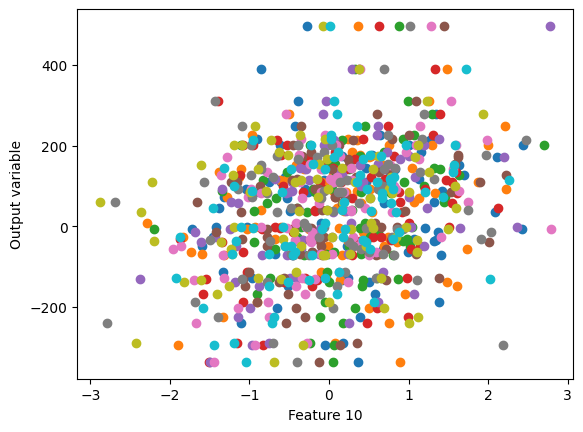

In [ ]:
import matplotlib.pyplot as plt

# Your code here
for i in range(10):
    plt.scatter(X_train[:,i], y_train)
    plt.xlabel(f"Feature {i+1}")
    plt.ylabel("Output variable")
    #plt.show()

[Note: Use this Link for help](https://www.tensorflow.org/tutorials/keras/regression)

In [ ]:
import numpy as np
print(np.isnan(X).sum())
print(np.isnan(y).sum())

0
0


## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 10 \\
> Dense of shape 50 \\
> Dense of shape 10 \\
Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [ ]:
import tensorflow as tf

# Define model architecture
model = tf.keras.Sequential([
    tf.keras.Input(shape=(10)),
    tf.keras.layers.Dense(50, activation='ReLU'),
    tf.keras.layers.Dense(10, activation='ReLU'),
    tf.keras.layers.Dense(5, activation='ReLU'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Define optimizer with Gradient Decay
initial_learning_rate = 0.00001
decay_steps = 10000
decay_rate = 0.96
optimizerss = tf.keras.optimizers.SGD(
    learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate,
        decay_steps,
        decay_rate
    )
)

# Compile model with Mean Actual Error loss and optimizer
model.compile(loss='mean_squared_error', optimizer=optimizerss)

# Print model summary
model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_168 (Dense)           (None, 50)                550       
                                                                 
 dense_169 (Dense)           (None, 10)                510       
                                                                 
 dense_170 (Dense)           (None, 5)                 55        
                                                                 
 dense_171 (Dense)           (None, 1)                 6         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

Epoch 1/1000
3/3 [==============================] - 1s 89ms/step - loss: 25125.8164 - val_loss: 26867.2773
Epoch 2/1000
3/3 [==============================] - 0s 17ms/step - loss: 25125.0996 - val_loss: 26867.0098
Epoch 3/1000
3/3 [==============================] - 0s 17ms/step - loss: 25124.3672 - val_loss: 26866.7871
Epoch 4/1000
3/3 [==============================] - 0s 18ms/step - loss: 25123.6465 - val_loss: 26866.5352
Epoch 5/1000
3/3 [==============================] - 0s 19ms/step - loss: 25122.8926 - val_loss: 26866.2617
Epoch 6/1000
3/3 [==============================] - 0s 18ms/step - loss: 25122.1172 - val_loss: 26865.9062
Epoch 7/1000
3/3 [==============================] - 0s 18ms/step - loss: 25121.1543 - val_loss: 26865.6309
Epoch 8/1000
3/3 [==============================] - 0s 18ms/step - loss: 25120.3516 - val_loss: 26865.2910
Epoch 9/1000
3/3 [==============================] - 0s 16ms/step - loss: 25119.5566 - val_loss: 26864.9727
Epoch 10/1000
3/3 [==================

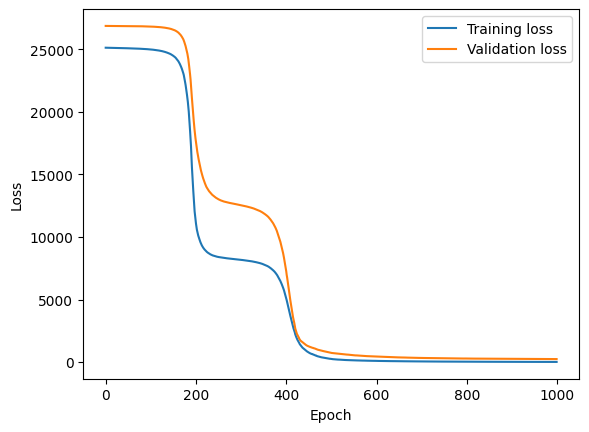

In [ ]:
import matplotlib.pyplot as plt

# Train model
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [ ]:
# Insert the function for R2 Score
from sklearn.metrics import r2_score

# Evaluate model on testing set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print R2 score
print(f"R2 score: {r2}")

1/1 [==============================] - 0s 70ms/step
R2 score: 0.9909679992625174
